In [107]:
import pandas as pd
import numpy as np
import math
import plotly as pl
import plotly.express as px

#from sympy import Matrix, init_printing
#init_printing()

Labels:

In [108]:
y = np.array([1, 12, 26, 31, 42, 57, 65, 76, 88, 94])

Training Data:

In [110]:
x = np.array([[ 1,  1, 100], 
               [ 5,  5, 88],
               [15,  9, 81],
               [40, 16, 65],
               [41, 22, 64],
               [45, 30, 51],
               [69, 28, 40],
               [70, 36, 26],
               [92, 42, 18],
               [96, 48, 9]])


Plot Data:

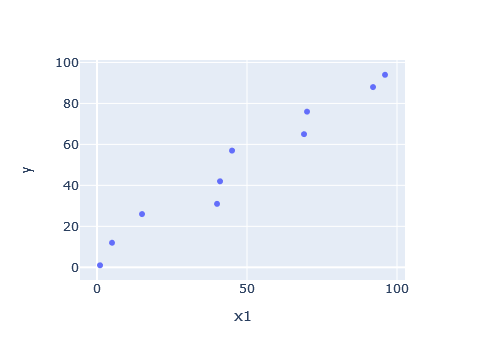

In [111]:
tmp = pd.DataFrame({'x1': (np.asarray(x[:,0])).flatten(),
                    'y': (np.asarray(y)).flatten()})

fig = px.scatter(tmp, x="x1", y="y")
fig.show()

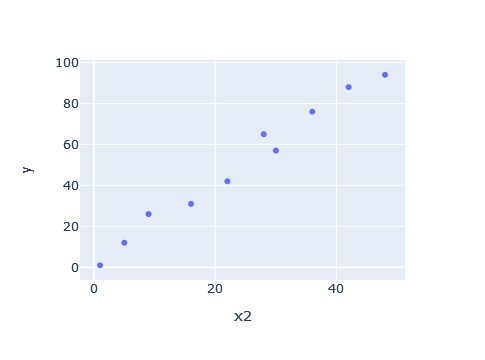

In [112]:
tmp = pd.DataFrame({'x2': (np.asarray(x[:,1])).flatten(),
                    'y': (np.asarray(y)).flatten()})

fig = px.scatter(tmp, x="x2", y="y")
fig.show()

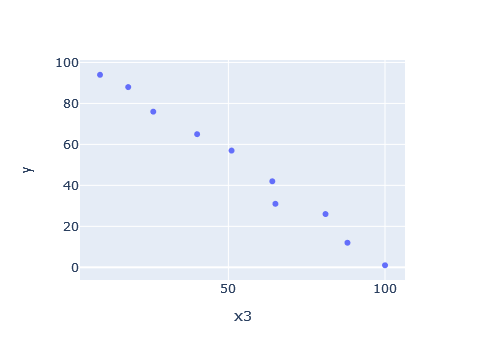

In [113]:
tmp = pd.DataFrame({'x3': (np.asarray(x[:,2])).flatten(),
                    'y': (np.asarray(y)).flatten()})

fig = px.scatter(tmp, x="x3", y="y")
fig.show()

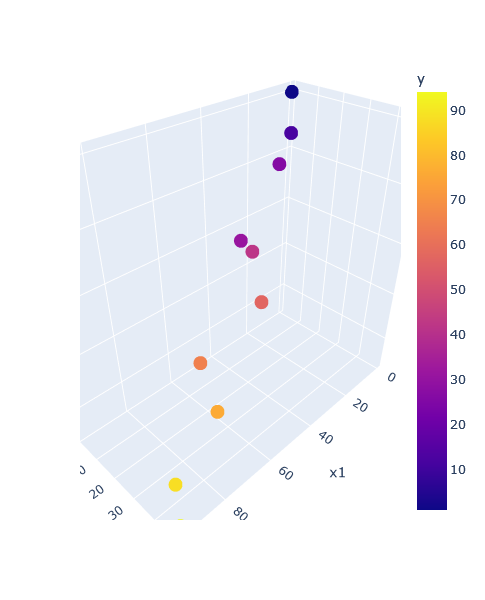

In [114]:
tmp = pd.DataFrame({'x1': (np.asarray(x[:,0])).flatten(),
                    'x2': (np.asarray(x[:,1])).flatten(),
                    'x3': (np.asarray(x[:,2])).flatten(),
                    'y': (np.asarray(y)).flatten()
                   })

fig = px.scatter_3d(tmp, x='x1', y='x2', z='x3', color = "y", height=600)
fig.show()

Add Bias:

In [115]:
x = np.c_[ x, np.ones(x.shape[0]) ] 
print(x)

[[  1.   1. 100.   1.]
 [  5.   5.  88.   1.]
 [ 15.   9.  81.   1.]
 [ 40.  16.  65.   1.]
 [ 41.  22.  64.   1.]
 [ 45.  30.  51.   1.]
 [ 69.  28.  40.   1.]
 [ 70.  36.  26.   1.]
 [ 92.  42.  18.   1.]
 [ 96.  48.   9.   1.]]


Random Coefficients:

In [116]:
B = np.random.rand(4)
print(B)

[0.37006141 0.66315043 0.02293393 0.67162855]


Calculate Squared Error:

In [118]:
div = 0

for i in range(0,x.shape[0]):
    
    y_i = y[i]
    x_i = (np.asarray(x[i])).flatten()
    div = div + ((y_i - (np.transpose(B) @ x_i))**2) 
    
print("MSR:", div)
print("MSR norm:", math.sqrt(div / x.shape[0]))

MSR: 2914.3503832933948
MSR norm: 17.071468546359434


In [122]:
div = ((y -(x @ B)).transpose()).dot( (y -(x @ B)) )
print("MSR:", div)
print("MSR norm:", math.sqrt(div / x.shape[0]))

MSR: 2914.3503832933948
MSR norm: 17.071468546359434


Calculate B:

In [139]:
m1 = np.linalg.inv((x.transpose()).dot(x))
m2 = (x.transpose()).dot(y)

B_new = m1.dot(m2)

print(B_new)

[-2.27706298e-02  7.69774184e-01 -6.62085036e-01  6.79206887e+01]


Make prediction:

In [143]:
B_new.dot(x[9])

96.72510371042426

In [146]:
y_pred = B_new.dot(x.T)

In [147]:
print(y_pred)

[ 2.45918858 13.39222323 20.87820892 36.29072305 41.54868256 56.22289899
 61.4197909  76.82440426 86.2387758  96.72510371]


Calculate Error again:

In [148]:
div = ((y -(x @ B_new)).transpose()).dot( (y -(x @ B_new)) )
print("MSR:", div)
print("MSR norm:", math.sqrt(div / x.shape[0]))

MSR: 83.12522492780852
MSR norm: 2.883144549407964


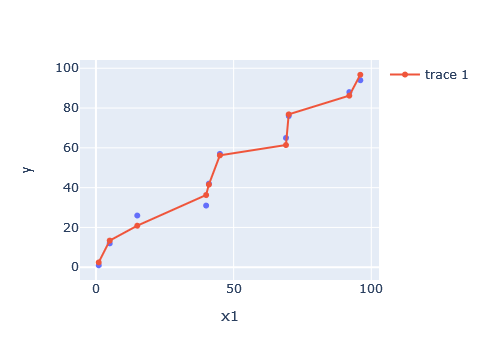

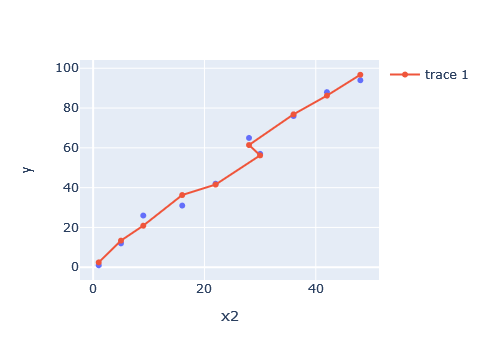

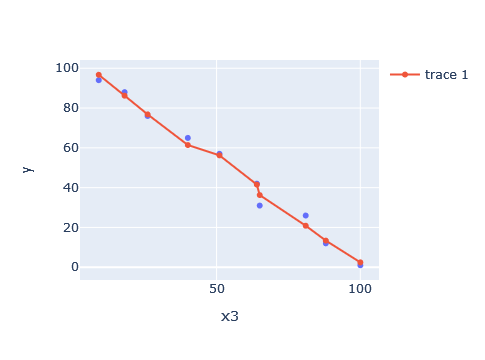

In [159]:
tmp = pd.DataFrame({'x1': (np.asarray(x[:,0])).flatten(),
                    'x2': (np.asarray(x[:,1])).flatten(),
                    'x3': (np.asarray(x[:,2])).flatten(),
                    'y': (np.asarray(y)).flatten(),
                    'y_pred': (np.asarray(y_pred)).flatten(),
                   })

### x1

fig = px.scatter(tmp, x="x1", y="y")
fig = fig.add_scatter(x=tmp["x1"], y=tmp["y_pred"])
fig.show()


### x2


fig = px.scatter(tmp, x="x2", y="y")
fig = fig.add_scatter(x=tmp["x2"], y=tmp["y_pred"])


fig.show()

### x3

fig = px.scatter(tmp, x="x3", y="y")
fig = fig.add_scatter(x=tmp["x3"], y=tmp["y_pred"])
fig.show()